# from google.colab import drive
drive.mount('/content/gdrive')
!cd '/content/gdrive/My Drive/'
#!i

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!cd '/content/gdrive/My Drive/'

Mounted at /content/gdrive


In [2]:
# LSTM for datacenter workload  problem with regression framing
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from pandas import read_csv
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

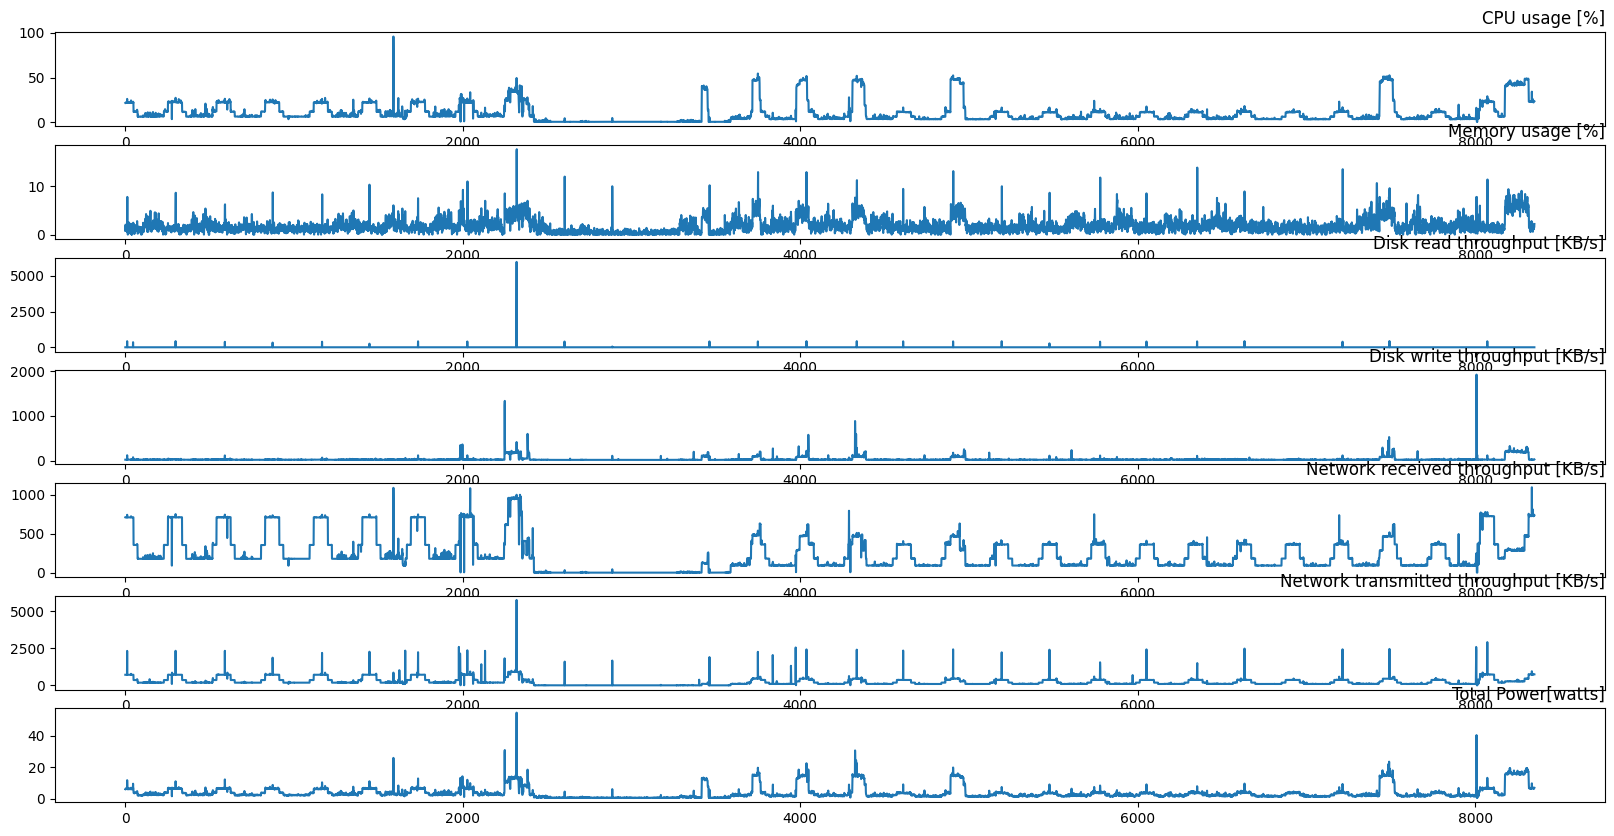

In [ ]:
#pd.read_csv("amazon_com_extras.csv", engine="python", sep=',', quotechar='"', error_bad_lines=False)
## fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset

#dataframe = read_csv('/home/abazari/Desktop/Materna-Trace-1/03.csv', usecols=[4] ,engine='python')

dataframe = read_csv('gdrive/My Drive/dataset/cleaned_23.csv',header=0, index_col=0, engine='python', sep = ';', quotechar = '"')
dataframe["CPU usage [%]"] = (dataframe["CPU usage [%]"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))
dataframe["Memory usage [%]"] = (dataframe["Memory usage [%]"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))

values = dataframe.values
"""print (dataframe.head())
plt.plot (dataframe["Memory usage [%]"])
plt.show()
"""
print (dataframe.head())



groups = [3, 6, 10, 11]
i = 1
# plot each column
#print (dataframe.head())
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataframe.columns[group], y=1, loc='right')
 i += 1
pyplot.show()

In [ ]:
dataframe.drop('CPU cores', axis=1, inplace=True)
dataframe.drop('CPU capacity provisioned [MHZ]', axis=1, inplace=True)
dataframe.drop('CPU usage [MHZ]', axis=1, inplace=True)
dataframe.drop('Memory capacity provisioned [KB]', axis=1, inplace=True)
dataframe.drop('Memory usage [KB]', axis=1, inplace=True)
dataframe.drop('Disk read throughput [KB/s]', axis=1, inplace=True)
dataframe.drop('Disk size [GB]', axis=1, inplace=True)
dataframe.drop('Disk write throughput [KB/s]', axis=1, inplace=True)

dataframe.to_csv('cleaned_06.csv')

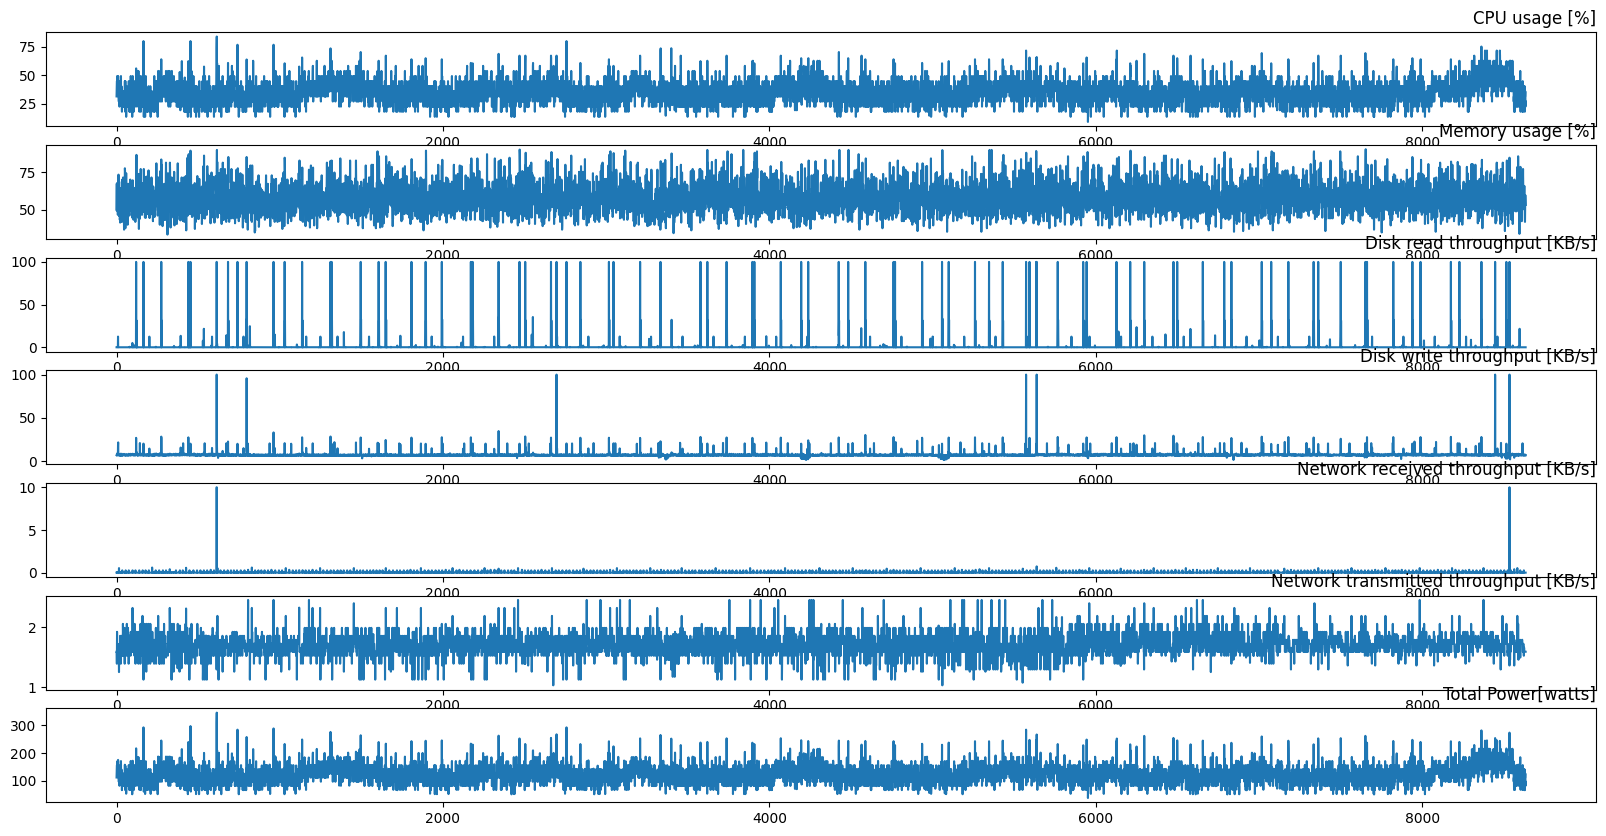

In [63]:
dataset = read_csv('gdrive/My Drive/archive/final_streaming.csv',header=0, index_col=0, engine='python')
values = dataset.values
groups = [0,1,2,3,4,5,6]
i = 1
pyplot.figure(figsize=(20,10))
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataset.columns[group], y=1, loc='right')
 i += 1
pyplot.show()

In [ ]:
print (dataset.shape)


(8352, 7)


In [4]:
# @title Default title text
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 """
 Frame a time series as a supervised learning dataset.
 Arguments:
 data: Sequence of observations as a list or NumPy array.
 n_in: Number of lag observations as input (X).
 n_out: Number of observations as output (y).
 dropnan: Boolean whether or not to drop rows with NaN values.
 Returns:
 Pandas DataFrame of series framed for supervised learning.
 """
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
    agg.dropna(inplace=True)
 return agg

In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

data = series_to_supervised(scaled,2,1)
print(data)

      var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var6(t-2)  \
2      0.298507   0.586781        0.0   0.055049   0.000000   0.393333   
3      0.417910   0.281000        0.0   0.057751   0.000000   0.393333   
4      0.477612   0.479340        0.0   0.057075   0.006667   0.253333   
5      0.477612   0.603304        0.0   0.074637   0.000000   0.626667   
6      0.537313   0.363639        0.0   0.056400   0.000000   0.393333   
...         ...        ...        ...        ...        ...        ...   
8630   0.417910   0.413221        0.0   0.054374   0.000000   0.393333   
8631   0.119403   0.198353        0.0   0.053023   0.000000   0.393333   
8632   0.298507   0.148765        0.0   0.057075   0.000000   0.393333   
8633   0.298507   0.272735        0.0   0.055724   0.000000   0.393333   
8634   0.358209   0.462812        0.0   0.062479   0.000000   0.393333   

      var7(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  ...  var5(t-1)  var6(t-1)  \
2      0.240368   0.417910   0.2

In [65]:
data.drop(data.columns[[-2,-3,-4,-5,-6,-7]], axis=1, inplace=True)
data.drop(data.columns[[6,13]], axis=1, inplace=True)
print (data.head())



   var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var6(t-2)  \
2   0.298507   0.586781        0.0   0.055049   0.000000   0.393333   
3   0.417910   0.281000        0.0   0.057751   0.000000   0.393333   
4   0.477612   0.479340        0.0   0.057075   0.006667   0.253333   
5   0.477612   0.603304        0.0   0.074637   0.000000   0.626667   
6   0.537313   0.363639        0.0   0.056400   0.000000   0.393333   

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var7(t)  
2   0.417910   0.281000        0.0   0.057751   0.000000   0.393333  0.382074  
3   0.477612   0.479340        0.0   0.057075   0.006667   0.253333  0.387828  
4   0.477612   0.603304        0.0   0.074637   0.000000   0.626667  0.429352  
5   0.537313   0.363639        0.0   0.056400   0.000000   0.393333  0.333214  
6   0.417910   0.347113        0.0   0.055724   0.000000   0.393333  0.284997  


In [66]:
# split into train and test sets
values = data.values


# split into x and y dataset
values_x , values_y = values[:, :-1] , values[:, -1]

print (f"value_x shape is :{values_x.shape}")
print (f"value_y shape is :{values_y.shape}")
#split data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(values_x, values_y, test_size=0.3, shuffle=False)

# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))


print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)


value_x shape is :(8633, 12)
value_y shape is :(8633,)
(6043, 1, 12)
(6043,)
(2590, 1, 12)
(2590,)


In [67]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(16))
model.compile(loss='mae', optimizer='adam')

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                12600     
                                                                 
 dense_4 (Dense)             (None, 16)                816       
                                                                 
Total params: 13416 (52.41 KB)
Trainable params: 13416 (52.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
history = model.fit(x_train, y_train, epochs = 100, batch_size=72, validation_data=(x_test, y_test), shuffle=False)


Epoch 1/100
84/84 [==============================] - 3s 11ms/step - loss: 0.1406 - val_loss: 0.0824
Epoch 2/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0792 - val_loss: 0.0813
Epoch 3/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0781 - val_loss: 0.0804
Epoch 4/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0773 - val_loss: 0.0796
Epoch 5/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0766 - val_loss: 0.0790
Epoch 6/100
84/84 [==============================] - 1s 6ms/step - loss: 0.0761 - val_loss: 0.0784
Epoch 7/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0757 - val_loss: 0.0780
Epoch 8/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0754 - val_loss: 0.0775
Epoch 9/100
84/84 [==============================] - 1s 6ms/step - loss: 0.0752 - val_loss: 0.0772
Epoch 10/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0750 - val_loss: 0.0769
Epoch 11

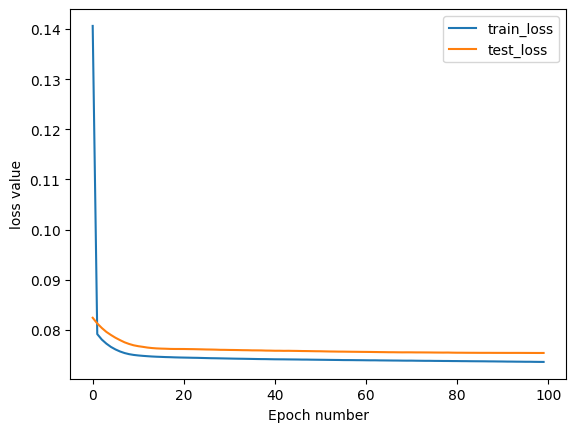

In [70]:
# plot history
fig,ax = pyplot.subplots()
ax.plot(history.history['loss'], label='train_loss')
ax.plot(history.history['val_loss'], label='test_loss')
ax.set_xlabel('Epoch number')
ax.set_ylabel('loss value')
ax.legend()
pyplot.show()

In [71]:
from keras.layers import concatenate
from numpy import sqrt
# make a prediction
yhat = model.predict(x_test)
test_X = x_test.reshape((x_test.shape[0], x_test.shape[2]))

81/81 [==============================] - 0s 2ms/step


In [72]:
yhat.shape

test_X.shape

# invert scaling for forecast

inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

inv_yhat.shape
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = y_test.reshape((len(y_test), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]


In [ ]:
inv_yhat = scaler.inverse_transform(inv_yhat)

In [ ]:
inv_y = scaler.inverse_transform(inv_y)


ValueError: operands could not be broadcast together with shapes (2505,12) (6,) (2505,12) 

In [73]:
# calculate RMSE
from sklearn.metrics import mean_absolute_error

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmae = sqrt(mean_absolute_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('Test RMSE: %.3f' % rmae)




Test RMSE: 0.099
Test RMSE: 0.275


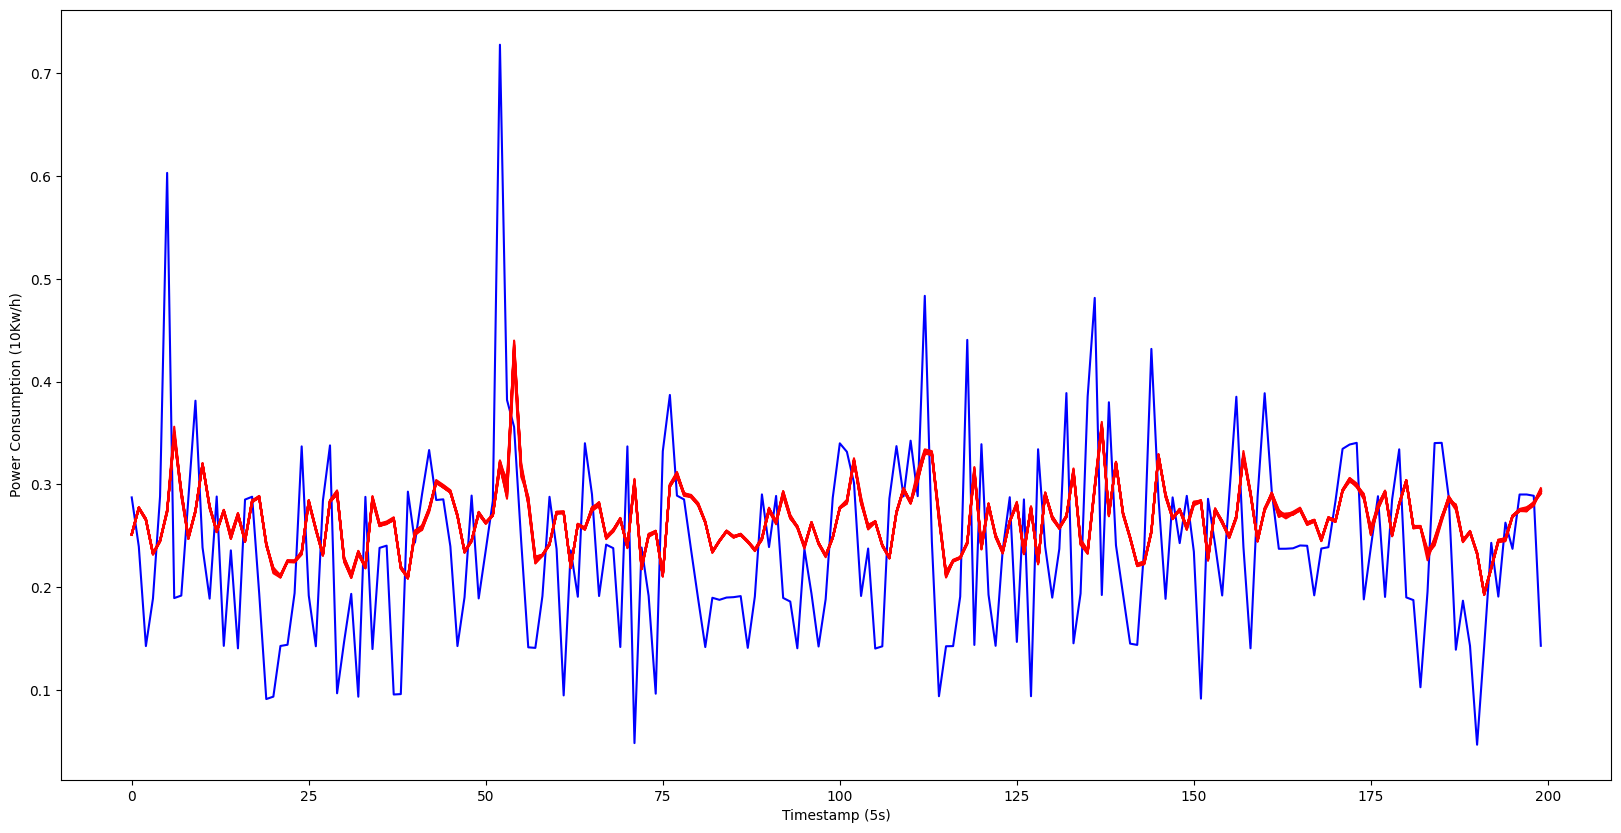

range(0, 2590) range(0, 2590)


In [74]:
fig, ax = pyplot.subplots(figsize=(20,10))
ax.plot(range(0,200), y_test[200:400], 'b', label='Actual')
ax.plot(range(0,200), yhat[200:400], 'r', label='Predicted')
ax.set_xlabel('Timestamp (5s)')
ax.set_ylabel('Power Consumption (10Kw/h)')
pyplot.show()
a = range(len(yhat))
b = range(len(y_test))
print (a,b)

In [ ]:
"""in this PART we will work on this topic to upload learned file"""
from numpy import loadtxt
name = 'power_cleaned_23.h5'
model.save(name)
print (f"model:{name} saved to file")

model:power_cleaned_23.h5 saved to file
